In [1]:
import Inflow
from ResearchProjects import adaptation
from ResearchProjects.adaptation.pipelines import pipelines
import pandas as pd, one
from pathlib import Path
import re
import pImage, numpy as np
import matplotlib.pyplot as plt

In [2]:
connector = one.ONE(data_access_mode = "remote")
session = connector.search(id = "wm32/2024-02-08/001", details = True, no_cache = True)

In [3]:
root = Path(session.path) / "1_photon_images"

In [4]:
images = [item.name for item in root.iterdir()]
images

['1p_1_moved_250um.png',
 '1p_1_reference.png',
 '1p_2_moved_150um.png',
 '1p_2_reference.png']

# ATTEMPT 1

In [93]:
attempt = 1
measurements = [ file for file in images if file.startswith(f"1p_{attempt}") ]
measurements

['1p_1_moved_250um.png', '1p_1_reference.png']

In [94]:
for file in measurements : 
    if "reference" in file :
        ref_img = np.array(pImage.pillow.open(root / file))
    if "moved" in file :
        displacement = int(re.findall("moved_(\d+)um",file)[0])
        test_img = np.array(pImage.pillow.open(root / file))

## 2D correlation based

Text(0.5, 0.98, '2D correlation between images')

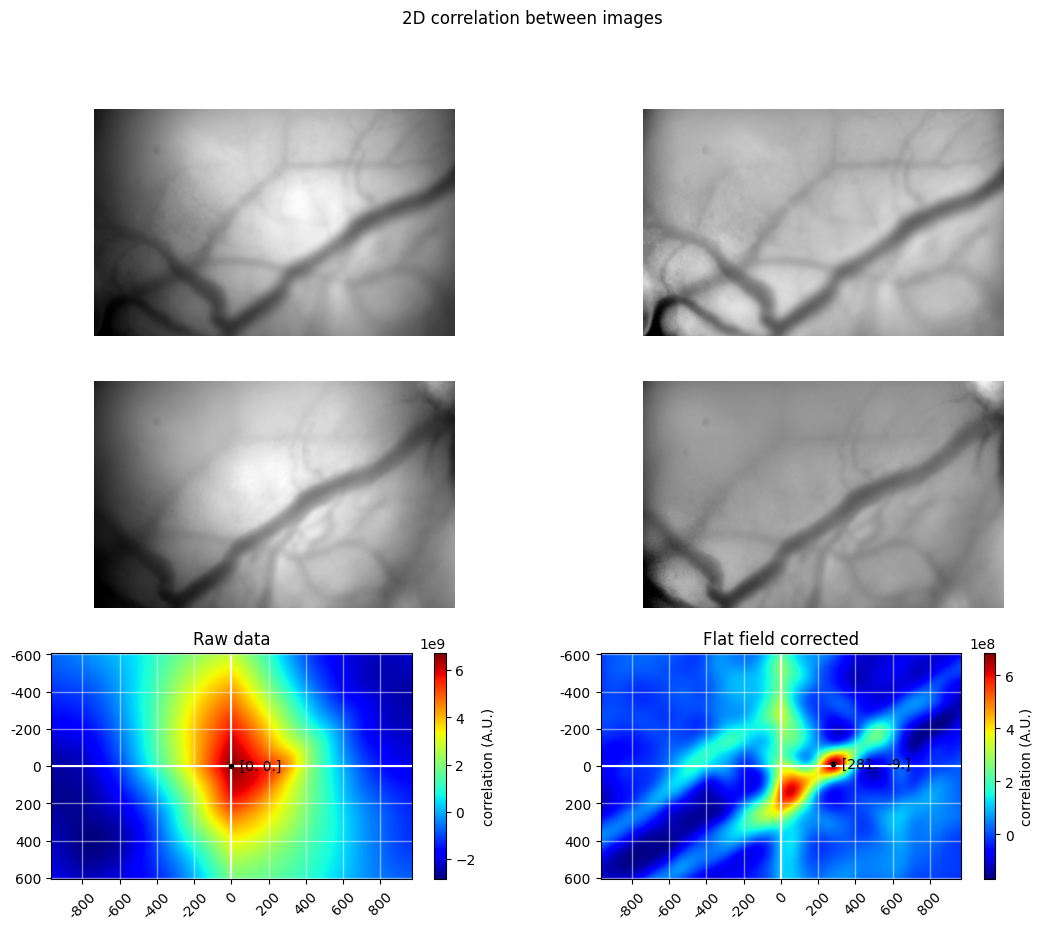

In [95]:
fig, axes = plt.subplots(3,2, figsize = (13,10))

results, _ = Inflow.plots.custom.correlation_center_image(ref_img, test_img, ax = axes[2,0], tick_spacing = 200, flat_field_corrected = False, title = "Raw data")
ffc_results, _ = Inflow.plots.custom.correlation_center_image(ref_img, test_img, ax = axes[2,1], tick_spacing = 200, gaussian = 1000, flat_field_corrected = True, title = "Flat field corrected")

axes[0,0].imshow(ref_img, cmap = "gray")
axes[0,1].imshow(ffc_results["reference_image"], cmap = "gray")
Inflow.plots.utils.clarify_image_ax(axes[0,0])
Inflow.plots.utils.clarify_image_ax(axes[0,1])

axes[1,0].imshow(test_img, cmap = "gray")
axes[1,1].imshow(ffc_results["measured_image"], cmap = "gray")
Inflow.plots.utils.clarify_image_ax(axes[1,0])
Inflow.plots.utils.clarify_image_ax(axes[1,1])

fig.suptitle("2D correlation between images")

## SIFT based

<Axes: >

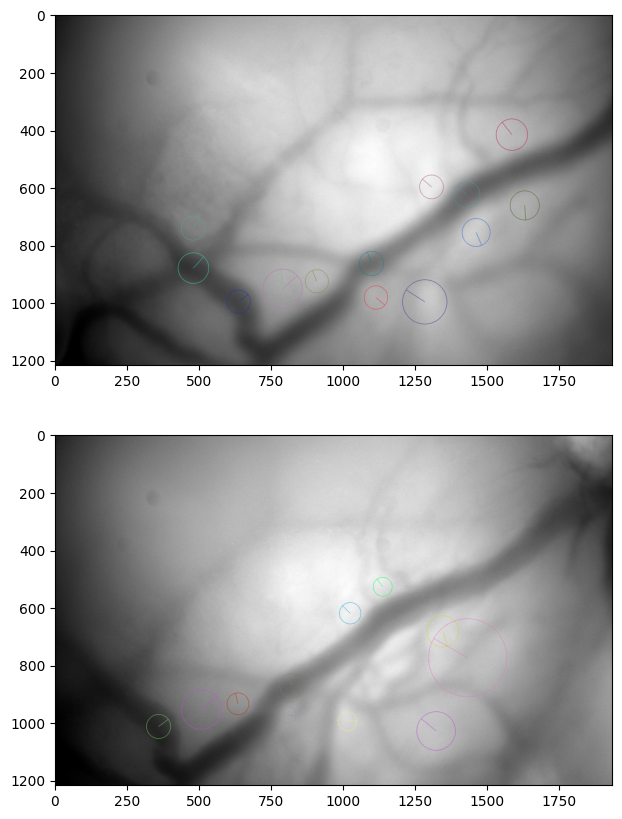

In [96]:
fig, axes = plt.subplots(2,1, figsize = (13,10))

sift = pImage.SiftComparison.from_images(ref_img,test_img)
sift.drawKeypoints("reference", ax = axes[0])
sift.drawKeypoints("measured", ax = axes[1])

In [97]:
print(sift.translation_x, sift.translation_y, sift.rotation)
print(sift)

-623.630658923916 470.6210600554091 34.52287956117551
Sift x : -623.63 y : 470.62 θ : 34.52 


# ATTEMPT 2

In [14]:
attempt = 2
measurements = [ file for file in images if file.startswith(f"1p_{attempt}") ]
measurements

['1p_2_moved_150um.png', '1p_2_reference.png']

In [15]:
for file in measurements : 
    if "reference" in file :
        ref_img = np.array(pImage.pillow.open(root / file))
    if "moved" in file :
        displacement = int(re.findall("moved_(\d+)um",file)[0])
        test_img = np.array(pImage.pillow.open(root / file))

## 2D correlation based

Text(0.5, 0.98, '2D correlation between images')

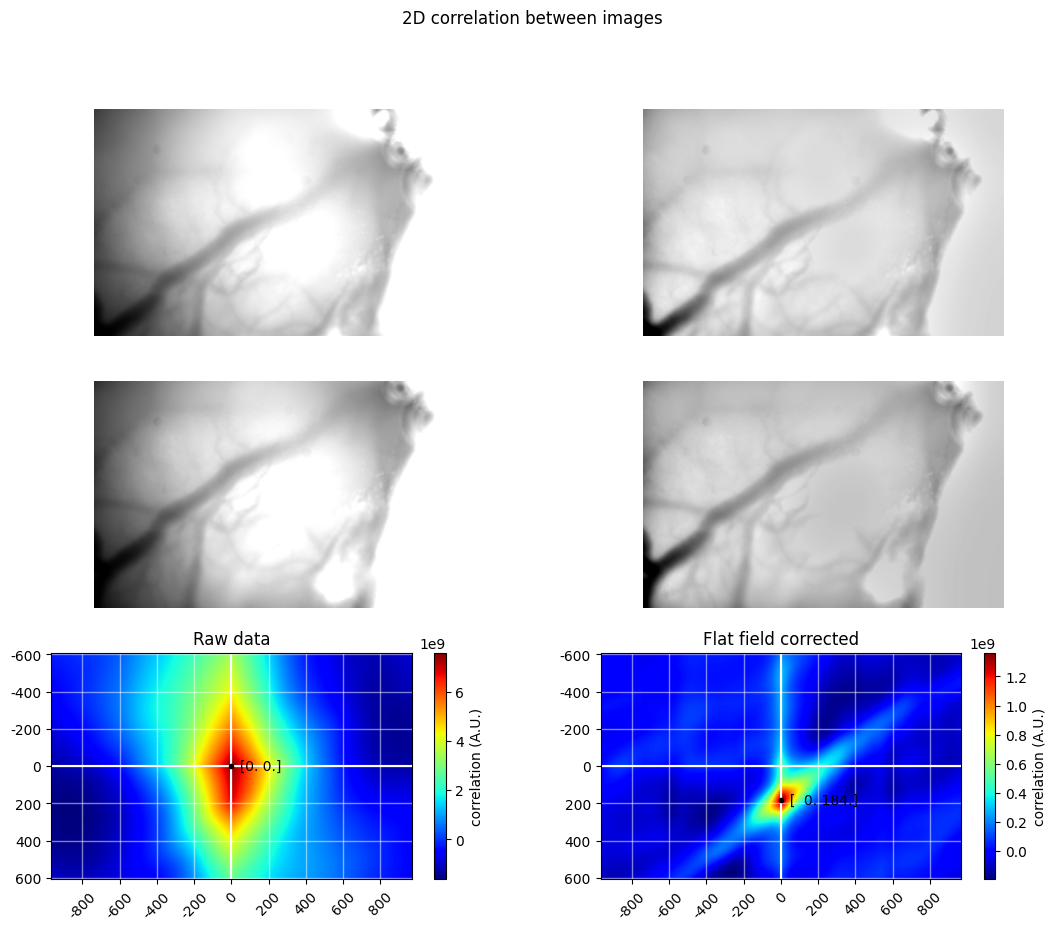

In [90]:
fig, axes = plt.subplots(3,2, figsize = (13,10))

results, _ = Inflow.plots.custom.correlation_center_image(ref_img, test_img, ax = axes[2,0], tick_spacing = 200, flat_field_corrected = False, title = "Raw data")
ffc_results, _ = Inflow.plots.custom.correlation_center_image(ref_img, test_img, ax = axes[2,1], tick_spacing = 200, gaussian = 1000, flat_field_corrected = True, title = "Flat field corrected")

axes[0,0].imshow(ref_img, cmap = "gray")
axes[0,1].imshow(ffc_results["reference_image"], cmap = "gray")
Inflow.plots.utils.clarify_image_ax(axes[0,0])
Inflow.plots.utils.clarify_image_ax(axes[0,1])

axes[1,0].imshow(test_img, cmap = "gray")
axes[1,1].imshow(ffc_results["measured_image"], cmap = "gray")
Inflow.plots.utils.clarify_image_ax(axes[1,0])
Inflow.plots.utils.clarify_image_ax(axes[1,1])

fig.suptitle("2D correlation between images")

## SIFT based

<Axes: >

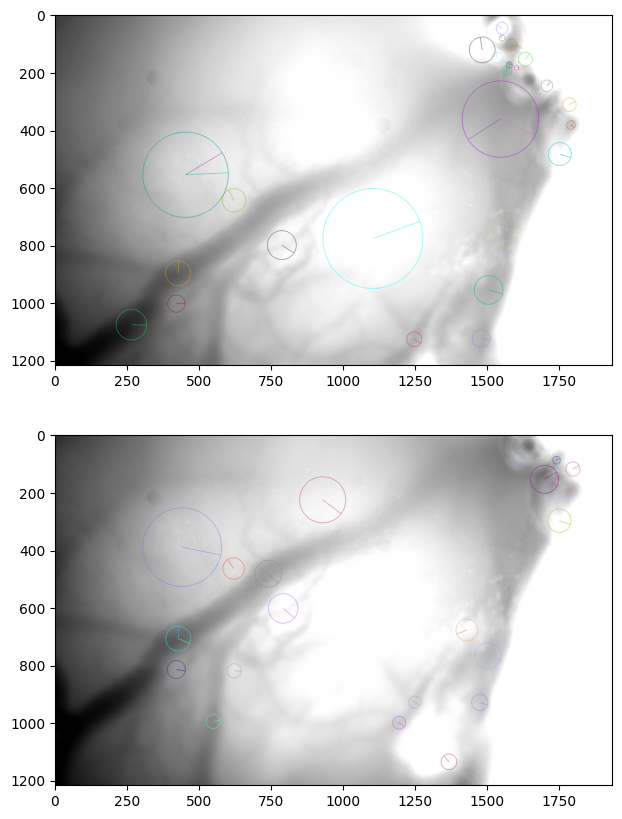

In [91]:
fig, axes = plt.subplots(2,1, figsize = (13,10))

sift = pImage.SiftComparison.from_images(ref_img,test_img)
sift.drawKeypoints("reference", ax = axes[0])
sift.drawKeypoints("measured", ax = axes[1])

In [92]:
print(sift.translation_x, sift.translation_y, sift.rotation)
print(sift)

1.0786504211993366 -186.50762275839838 -0.09533717797783638
Sift x : 1.08 y : -186.51 θ : -0.10 
